In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

nasdaq_returns = pd.read_csv('data/nasdaq_top_10_returns.csv')

In [3]:

market_caps = np.array([2661, 2546, 1978, 1965, 1799, 1093, 960, 731, 319, 306])
mcap_weights = market_caps/sum(market_caps)

In [4]:

# calculate the Pearson correlation coefficient matrix for the 10 stocks
# this tells us how similarly each variable moves relative to another
correlation_matrix = nasdaq_returns.corr()
print(correlation_matrix)

           MSFT      AAPL      AMZN      TSLA      NVDA      GOOG     GOOGL  \
MSFT   1.000000  0.637678  0.577705  0.311705  0.543100  0.691554  0.703122   
AAPL   0.637678  1.000000  0.578515  0.350997  0.450155  0.526095  0.533874   
AMZN   0.577705  0.578515  1.000000  0.281532  0.487039  0.559908  0.562366   
TSLA   0.311705  0.350997  0.281532  1.000000  0.367905  0.240640  0.235716   
NVDA   0.543100  0.450155  0.487039  0.367905  1.000000  0.418619  0.440991   
GOOG   0.691554  0.526095  0.559908  0.240640  0.418619  1.000000  0.977442   
GOOGL  0.703122  0.533874  0.562366  0.235716  0.440991  0.977442  1.000000   
FB     0.490626  0.508039  0.512029  0.290057  0.411890  0.579741  0.594657   
ADBE   0.702647  0.581637  0.581815  0.387159  0.631279  0.530458  0.536971   
NFLX   0.464855  0.416938  0.449077  0.240847  0.358664  0.418571  0.427844   

             FB      ADBE      NFLX  
MSFT   0.490626  0.702647  0.464855  
AAPL   0.508039  0.581637  0.416938  
AMZN   0.512029 

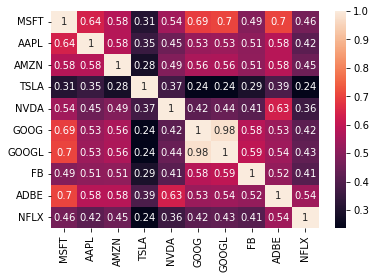

In [5]:

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [6]:

# calculate the covariance matrix of the top 10 stocks
# NOTE: correlation is a normalised measure of the covariance
# this tells us the joint variablity (risk) of any two variables
covariance_matrix = nasdaq_returns.cov()
print(covariance_matrix)

           MSFT      AAPL      AMZN      TSLA      NVDA      GOOG     GOOGL  \
MSFT   0.000156  0.000124  0.000106  0.000136  0.000170  0.000127  0.000132   
AAPL   0.000124  0.000243  0.000133  0.000191  0.000176  0.000120  0.000126   
AMZN   0.000106  0.000133  0.000216  0.000144  0.000180  0.000121  0.000125   
TSLA   0.000136  0.000191  0.000144  0.001212  0.000322  0.000123  0.000124   
NVDA   0.000170  0.000176  0.000180  0.000322  0.000631  0.000154  0.000167   
GOOG   0.000127  0.000120  0.000121  0.000123  0.000154  0.000215  0.000216   
GOOGL  0.000132  0.000126  0.000125  0.000124  0.000167  0.000216  0.000228   
FB     0.000111  0.000143  0.000136  0.000182  0.000187  0.000153  0.000162   
ADBE   0.000132  0.000136  0.000129  0.000203  0.000238  0.000117  0.000122   
NFLX   0.000118  0.000132  0.000134  0.000170  0.000183  0.000125  0.000131   

             FB      ADBE      NFLX  
MSFT   0.000111  0.000132  0.000118  
AAPL   0.000143  0.000136  0.000132  
AMZN   0.000136 

In [7]:

# annualise the covariance matrix for portfolio optimisation and risk management purposes down the line
annualised_covariance_matrix = covariance_matrix * 252

In [8]:

# calculate daily portfolio volatility using the covariance matrix, assuming a market cap weighted portfolio
portfolio_volatility = np.sqrt(np.dot(mcap_weights.T, np.dot(covariance_matrix, mcap_weights)))
print("Daily portfolio volatility is {:.2f}".format(portfolio_volatility*100)+"%.")

Daily portfolio volatility is 1.36%.


In [9]:

# calculate annualised portfolio volatility using the covariance matrix, assuming a market cap weighted portfolio
annualised_portfolio_volatility = np.sqrt(np.dot(mcap_weights.T, np.dot(annualised_covariance_matrix, mcap_weights)))
print("Annualised portfolio volatility is {:.2f}".format(annualised_portfolio_volatility*100)+"%.")

Annualised portfolio volatility is 21.57%.
